In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/34 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N20.JPG
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N1.JPG
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/49 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N15.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/No18.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/31 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/no 6.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/3 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/no 5.jpeg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/no 1.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/26 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N26.JPG
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N5.jpg
/kaggle/input/brain-mri-images-for-b

In [2]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

# Load images
def load_images(path):
    images = []
    labels = []
    for foldername in os.listdir(path):
        if foldername.startswith("."):
            continue
        if foldername.startswith("brain_tumor_dataset"):
            continue
        label = 1 if foldername == "yes" else 0
        folderpath = os.path.join(path, foldername)
        print(folderpath)
        for filename in os.listdir(folderpath):
            if filename.startswith("."):
                continue
            imagepath = os.path.join(folderpath, filename)
            print(imagepath)
            image = cv2.imread(imagepath, cv2.IMREAD_GRAYSCALE)
            image = cv2.resize(image, (256, 256)) # Resize image to (256, 256)
            images.append(image)
            labels.append(label)
    return np.array(images), np.array(labels)

images, labels = load_images("/kaggle/input/brain-mri-images-for-brain-tumor-detection")
print(images)
# Preprocess images
images = np.expand_dims(images, axis=-1) # Add channel dimension
images = images.astype('float32') / 255.0 # Normalize pixel values

# Split dataset into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)



/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/brain-mri-images-for-brain-tumor-detection/no
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/34 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N20.JPG
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N1.JPG
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/49 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N15.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/No18.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/31 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/no 6.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/3 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/no 5.jpeg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/no 1.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/26 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N26.JPG
/kaggle/input/brain-mri-images-for-brain-tu

In [3]:
# Define the model architecture
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(256,256,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

# Evaluate the model


Epoch 1/10
6/6 [==============================] - 13s 2s/step - loss: 0.6892 - accuracy: 0.6149 - val_loss: 0.5336 - val_accuracy: 0.8049
Epoch 2/10
6/6 [==============================] - 12s 2s/step - loss: 0.5453 - accuracy: 0.7143 - val_loss: 0.5077 - val_accuracy: 0.8293
Epoch 3/10
6/6 [==============================] - 11s 2s/step - loss: 0.5282 - accuracy: 0.7267 - val_loss: 0.5159 - val_accuracy: 0.8293
Epoch 4/10
6/6 [==============================] - 11s 2s/step - loss: 0.5292 - accuracy: 0.7640 - val_loss: 0.5378 - val_accuracy: 0.8049
Epoch 5/10
6/6 [==============================] - 12s 2s/step - loss: 0.4952 - accuracy: 0.7950 - val_loss: 0.4685 - val_accuracy: 0.8293
Epoch 6/10
6/6 [==============================] - 11s 2s/step - loss: 0.4388 - accuracy: 0.7764 - val_loss: 0.5390 - val_accuracy: 0.8293
Epoch 7/10
6/6 [==============================] - 11s 2s/step - loss: 0.4787 - accuracy: 0.7826 - val_loss: 0.5174 - val_accuracy: 0.8049
Epoch 8/10
6/6 [==================

In [4]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print("Test accuracy:", accuracy)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert predictions to class labels
y_pred_labels = (y_pred > 0.5).astype('int32')

# Calculate metrics
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred_labels))
print("Classification report:")
print(classification_report(y_test, y_pred_labels))


2/2 [==============================] - 1s 345ms/step - loss: 0.3275 - accuracy: 0.8627
Test accuracy: 0.8627451062202454
2/2 [==============================] - 2s 445ms/step
Confusion matrix:
[[17  3]
 [ 4 27]]
Classification report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        20
           1       0.90      0.87      0.89        31

    accuracy                           0.86        51
   macro avg       0.85      0.86      0.86        51
weighted avg       0.86      0.86      0.86        51



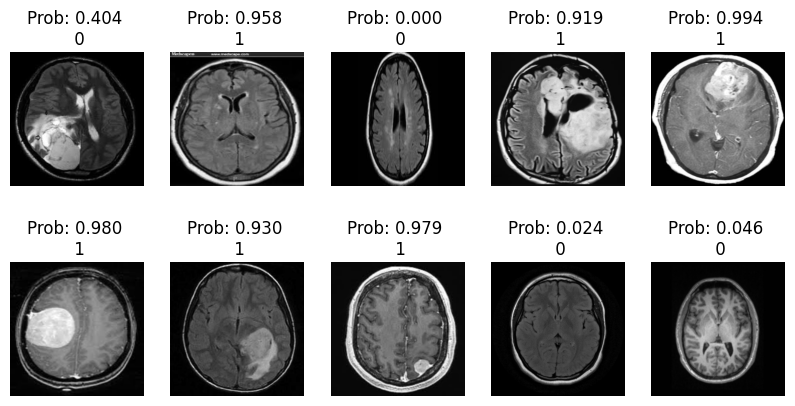

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Plot the predicted class probabilities for the first 10 examples in the test set
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i], cmap='gray')
    plt.axis('off')
    plt.title(f'Prob: {y_pred[i][0]:.3f} \n {y_pred_labels[i][0]}')

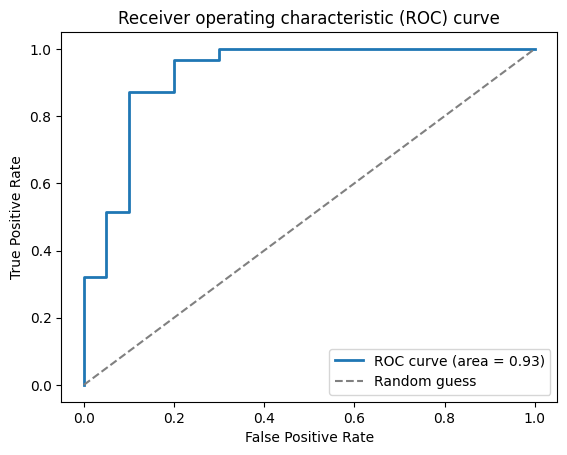

In [6]:
# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()
